# 2023 5월 주식 데이터 리뷰

In [ ]:
import numpy as np
import pandas as pd

## 주식 메타 데이터 불러오기

### 데이터 분석 방향


 보통 월간 데이터를 살펴볼 때 월 시작시 수집된 메타데이터와 월 시작, 종료시 모멘텀 데이터들을 기준으로 분석을 진행합니다.
 모멘텀은 한 달간 얼마나 상승했는지를 나타냅니다.


```python
stock_dt_table = boto3.resource('dynamodb').Table('stock_dt')
stock_meta_table = boto3.resource('dynamodb').Table('stock_meta')
stock_momentum_table = boto3.resource('dynamodb').Table('stock_momentum')
stock_sector_table = boto3.resource('dynamodb').Table('stock_sector')

meta_5_df = pd.DataFrame(stock_meta_table.query(KeyConditionExpression=boto3.dynamodb.conditions.Key('dt').eq('20230501'))['Items'])

momentum_5_df = pd.DataFrame(stock_momentum_table.query(KeyConditionExpression=boto3.dynamodb.conditions.Key('dt').eq('20230501'))['Items'])
momentum_6_df = pd.DataFrame(stock_momentum_table.query(KeyConditionExpression=boto3.dynamodb.conditions.Key('dt').eq('20230601'))['Items'])

momentum_df = pd.merge(momentum_5_df, momentum_6_df, on='code', suffixes=('_5', '_6'))
momentum_df = momentum_df[['code', 'm30_5', 'm30_6']]

df = pd.merge(meta_5_df, momentum_df, on='code')
df.RR = df.RR.astype(float)
df.ROA = df.ROA.astype(float)
df.OIGR = df.OIGR.astype(float)
df.ROE = df.ROE.astype(float)
df.PER = df.PER.astype(float)
df.PBR = df.PBR.astype(float)
df.dropna(inplace=True)
```

In [31]:
df = pd.read_csv('./data/202305_stock_meta.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
df.head(5)

,RR,dt,ROA,code,OIGR,ROE,name,PER,N,PBR,m30_5,m30_6,RR_qt,ROA_qt,OIGR_qt,ROE_qt,PER_qt,PBR_qt,m5_qt,m6_qt
0,1215.5,20230501,4.75,20,32.98,5.73,동화약품,11.48,547,0.64,1.009443,1.162903,17,20,19,16,18,7,18,26
1,-56.6,20230501,-8.19,40,-131.11,-19.06,KR모터스,-9.71,993,1.94,1.390396,1.001951,0,4,3,4,5,21,28,11
2,5633.7,20230501,0.35,50,-40.71,0.59,경방,65.59,484,0.35,0.986201,0.980332,27,10,8,10,27,2,14,7
3,3792.7,20230501,2.35,70,-62.38,4.01,삼양홀딩스,9.44,284,0.33,1.005753,0.955181,26,15,6,14,16,1,18,4
4,240.2,20230501,2.49,80,9.45,7.72,하이트진로,18.22,166,1.34,0.994789,1.020449,5,15,16,19,22,17,16,14


## 각 특성 데이터별 N분위 데이터로 변환

각 수치들이 실수데이터를 갖기때문에
상대적인 크기를 비교하기 위해 N분위로 표기하도록 변경합니다

In [43]:
N = 30
df['RR_qt'] = pd.qcut(df['RR'], N, labels=False)
df['ROA_qt'] = pd.qcut(df['ROA'], N, labels=False)
df['OIGR_qt'] = pd.qcut(df['OIGR'], N, labels=False)
df['ROE_qt'] = pd.qcut(df['ROE'], N, labels=False)
df['PER_qt'] = pd.qcut(df['PER'], N, labels=False)
df['PBR_qt'] = pd.qcut(df['PBR'], N, labels=False)
df['m5_qt'] = pd.qcut(df['m30_5'], N, labels=False)
df['m6_qt'] = pd.qcut(df['m30_6'], N, labels=False)

/usr/local/lib/python3.10/dist-packages/ipympl/backend_nbagg.py:336: UserWarning:

Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.

/usr/local/lib/python3.10/dist-packages/ipympl/backend_nbagg.py:336: UserWarning:

Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.

/usr/local/lib/python3.10/dist-packages/ipympl/backend_nbagg.py:336: UserWarning:

Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/ipympl/backend_nbagg.py:336: UserWarning:

Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.



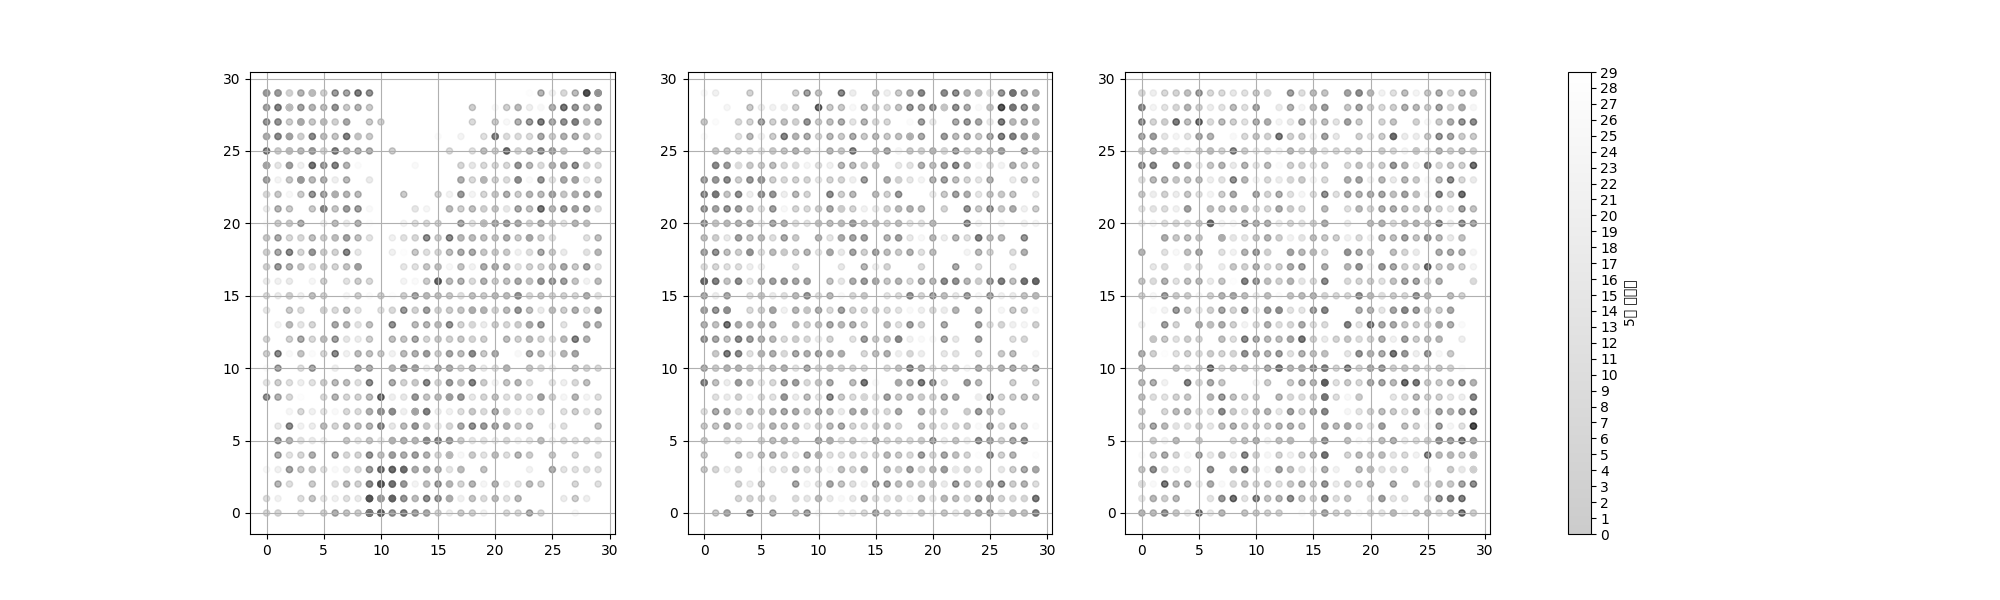

/usr/local/lib/python3.10/dist-packages/ipympl/backend_nbagg.py:279: UserWarning:

Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.

/usr/local/lib/python3.10/dist-packages/ipympl/backend_nbagg.py:279: UserWarning:

Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.

/usr/local/lib/python3.10/dist-packages/ipympl/backend_nbagg.py:279: UserWarning:

Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/ipympl/backend_nbagg.py:279: UserWarning:

Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.



In [46]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20, 6), ncols=3)

axes[0].scatter(df['PER_qt'], df['PBR_qt'], s=20, c=df['m6_qt'], cmap='gray', alpha=0.2)
axes[1].scatter(df['PBR_qt'], df['m5_qt'], s=20, c=df['m6_qt'], cmap='gray', alpha=0.2)
axes[2].scatter(df['m5_qt'], df['PER_qt'], s=20, c=df['m6_qt'], cmap='gray', alpha=0.2)
#set colormap in axes
cbar = fig.colorbar(axes[0].collections[0], ax=axes)
cbar.set_ticks(np.arange(0, 30, 1))
cbar.set_ticklabels(np.arange(0, 30, 1))
cbar.set_label('5월 수익률')
for ax in axes: ax.grid()

> 각 점에 여러 주식들이 겹칠 수 있고, 겹쳐진 주식의 수익률도 보일 수 있도록 투명도를 주었습니다.
> 평균적으로 띄는 색갈이 해당 분위에 해당하는 평균 수익률에 해당하는 색으로 이해하면 됩니다.